# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: <a href="https://github.com/realblack0/ai_lecture_fundamental">here</a>  
E-Mail: realblack0@gmail.com

## pandas
- 2차원 정형 데이터에 대한 분석 및 전처리
- numpy를 기반으로 한다.

연습용 데이터를 불러오기 위해서 seaborn을 활용한다. seaborn은 data visualization 라이브러리로서, 보통 pandas와 같이 사용한다.

In [1]:
from seaborn import load_dataset

seaborn Import Error가 발생하면 아래 명령어를 실행하여 seaborn을 설치한다.

In [ ]:
# !pip install seaborn

seaborn의 연습용 데이터셋은 pandas로 되어 있다.

In [2]:
# load_dataset은 연습용 데이터셋을 불러올 때 사용
tips = load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


`dtypes`는 열별로 데이터 타입을 알려준다.

In [79]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

numpy를 기반으로 만들어졌기 때문에, numpy의 기능을 거의 그대로 사용할 수 있다.

In [80]:
tips.shape

(244, 7)

값을 뽑을 때는 numpy와 조금 다르다. numpy에서 처럼 인덱싱할 수 없다.

In [81]:
# error
tips[0]

KeyError: 0

인덱싱할 때는 `loc`을 이용한다.  
numpy의 `r_`와 같이 인덱서이므로, 대괄호를 사용해야하는 특징이 있다.

In [82]:
tips.loc[0] # 인덱서 : 소괄호 대신 대괄호를 사용함.

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [84]:
tips.loc[:3] # 슬라이싱도 가능

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


## structured array와 pandas

structured array는 homogeneous하지 않게 ndarray를 만드는 방법이다.  
pandas는 structured array를 기반으로 만들어졌기 때문에 heterogeneous하다.

In [6]:
# structured array 예시
x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)],
             dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])

In [7]:
x

array([('Rex', 9, 81.), ('Fido', 3, 27.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

### dictionary 방식 접근

structured array는 dictionary처럼 이름만으로 값을 뽑아올 수 있다.

In [8]:
x["name"]

array(['Rex', 'Fido'], dtype='<U10')

pandas도 dictionary 방식으로 이름을 이용해 값을 뽑을 수 있다.

In [9]:
tips["tip"]

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

structured array는 숫자로도 인덱싱 가능하지만 pandas는 안된다. pandas가 약간 명확하지 않은 부분이 있다.

In [90]:
x[0] 

('Rex', 9, 81.)

### pandas fancy indexing

structured array가 fancy indexing이 가능하기 때문에, pandas도 fancy indexing이 가능하다.

In [11]:
# structured array의 fancy indexing
x[['name', 'age']] 

array([('Rex', 9), ('Fido', 3)],
      dtype={'names':['name','age'], 'formats':['<U10','<i4'], 'offsets':[0,40], 'itemsize':48})

fancy indexing은 리스트 순서를 바꾸면 값모양도 달라진다. 

In [10]:
x[['age', 'name']]

array([(9, 'Rex'), (3, 'Fido')],
      dtype={'names':['age','name'], 'formats':['<i4','<U10'], 'offsets':[40,0], 'itemsize':48})

pandas에서 fancy indexing으로 열 2개를 동시에 뽑으면 다음과 같다.

In [94]:
tips[['smoker', 'day']]

,smoker,day
0,No,Sun
1,No,Sun
2,No,Sun
3,No,Sun
4,No,Sun
...,...,...
239,No,Sat
240,Yes,Sat
241,Yes,Sat
242,No,Sat


괄호 1개일때는 fancy indexing을 지원하지 않으므로 error가 발생한다.

In [95]:
# Error
tips['smoker', 'day']

KeyError: ('smoker', 'day')

괄호를 하나만 썼을 때는 한 줄만 뽑을 수 있다.  
그런데, 한 줄 뽑았을 때랑, 2줄을 뽑았을 때 모양이 다르다.

In [96]:
# 문자만 나열
tips['smoker']

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): [Yes, No]

In [98]:
# 예쁜 표 모양
tips[['smoker', 'day']]

,smoker,day
0,No,Sun
1,No,Sun
2,No,Sun
3,No,Sun
4,No,Sun
...,...,...
239,No,Sat
240,Yes,Sat
241,Yes,Sat
242,No,Sat


위의 두 셀의 리턴값은 타입이 다르다. 1개 만 뽑았을 때는 Siries, 2개 뽑을 때는 DataFrame이다.

In [13]:
print("1줄일 때:", type(tips['smoker']))
print("2줄일 때:", type(tips[['smoker', 'day']]))

1줄일 때: <class 'pandas.core.series.Series'>
2줄일 때: <class 'pandas.core.frame.DataFrame'>


fancy indexing 방법으로는 1줄만 뽑아도 DataFrame으로 반환한다. fancy indexing은 항상 DataFrame으로 뽑는다.

In [15]:
print(type(tips[['smoker']]))
tips[['smoker']]

<class 'pandas.core.frame.DataFrame'>


,smoker
0,No
1,No
2,No
3,No
4,No
...,...
239,No
240,Yes
241,Yes
242,No


numpy의 집합연산 기능을 그대로 이용할 수 있다.  
이를 이용해서 특정한 열에서만 평균값을 구할 수 있다.

In [103]:
tips[['total_bill', 'tip']].mean() # total_bill열, tip열의 각 평균 구하기

total_bill    19.785943
tip            2.998279
dtype: float64

## pandas -> numpy 변환
pandas에서 `.values`하면 numpy array로 바꾼다

In [105]:
tips.values

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

columns는 열이름들을 뽑아준다.

In [106]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## 값 변경하기

pandas도 broadcasting을 지원한다.

In [178]:
tips['tip'] + 1 # broadcasting

0      2.01
1      2.66
2      4.50
3      4.31
4      4.61
       ... 
239    6.92
240    3.00
241    3.00
242    2.75
243    4.00
Name: tip, Length: 244, dtype: float64

연산 결과는 데이터에 반영되지 않는다. 값을 바꾸기 위해서는 재할당을 해야한다.

In [179]:
tips # 바뀌지 않음

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [180]:
tips['tip'] = tips['tip'] + 1 # 재할당해서 값을 바꾼다.

In [181]:
tips # 바뀜

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.01,Female,No,Sun,Dinner,2
1,10.34,2.66,Male,No,Sun,Dinner,3
2,21.01,4.50,Male,No,Sun,Dinner,3
3,23.68,4.31,Male,No,Sun,Dinner,2
4,24.59,4.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,6.92,Male,No,Sat,Dinner,3
240,27.18,3.00,Female,Yes,Sat,Dinner,2
241,22.67,3.00,Male,Yes,Sat,Dinner,2
242,17.82,2.75,Male,No,Sat,Dinner,2


### 원본 보존

데이터를 변형하면 원래의 데이터로 돌아갈 수 없다. 새롭게 데이터를 불러와야하는 번거로움이 있다.
보통 원본을 copy해서 보존한다.

In [17]:
tips = load_dataset('tips')

In [18]:
tips_raw = tips.copy() # numpy의 copy는 deep copy
                       # 원본 보존 용

## attribute 방식 접근

pandas에서는 ( . )으로 값을 뽑을 수도 있다. ( . )으로 접근하는 방법을 attribute 방식이라고 한다.

In [185]:
tips.tip # 

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

numpy에서는 attribute 방식으로 접근할 수 없다. pandas에서만 가능한 차이점이 있다.

In [19]:
x = np.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)],
             dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])

In [20]:
# Error
x.name

AttributeError: 'numpy.ndarray' object has no attribute 'name'

단, numpy에 있는 메소드와 이름이 겹치면 점으로 접근할 수 없다. 

In [186]:
tips.size # numpy의 size 메소드가 실행된다.

1708

이런 경우에는 dictionary 방식만 쓸 수 있다.   
이외에도 이름이 특수문자로 시작하거나, 이름이 숫자로 시작하거나, 이름에 공백이 있는 경우도 attribute 방식으로 접근할 수 없다.  
이런 경우를 방지하기 위해서 보통 처음에 이름부터 수정하고 시작한다. 

In [187]:
tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

## pandas 활용: tips 데이터 기초분석
남자와 여자 중 누가 더 tip을 많이 냈을까?

tips 데이터의 남여 지출 및 팁의 평균은 다음과 같다. 남자가 평균 팁이 더 많다.

In [188]:
tips.groupby('sex').mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


지출 대비 팁의 비율을 계산해서 tips_ratio라는 새로운 열로 추가한다.

In [190]:
tips["tips_ratio"] = tips.tip / tips.total_bill

지출 대비 팁으로 비교해보면 여자가 팁을 더 많이 낸다는 것을 알 수 있다.

In [191]:
tips.groupby('sex').mean()

,total_bill,tip,size,tips_ratio
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


pandas는 데이터 시각화도 바로 할 수 있다.

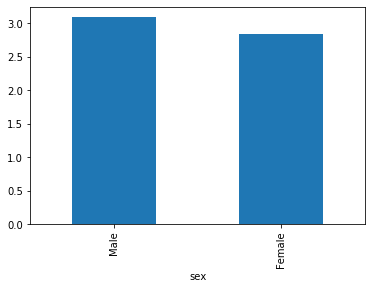

In [192]:
tips.groupby('sex').mean()['tip'].plot.bar()

의도적으로 데이터를 왜곡하는 사람도 있다. 다음과 같이 차이가 나는 부분만 강조하기도 한다. 하지만 사실 남녀 간에 팁 차이는 미미하다.  

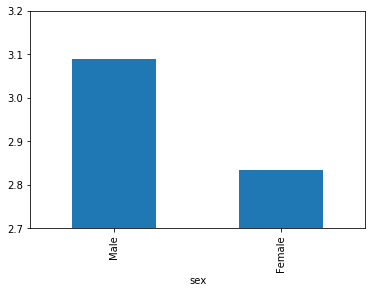

In [202]:
tips.groupby('sex').mean()['tip'].plot.bar(ylim=[2.7, 3.2]) # 데이터 조작

pandas에서는 데이터 전처리(preprocessing), 랭글링(wrangling)할 때 map, filter, reduce 를 많이 활용한다.

In [195]:
tips.sex = tips.sex.map({'Female':1, "Male":0})

In [196]:
tips

,total_bill,tip,sex,smoker,day,time,size,tips_ratio
0,16.99,1.01,1,No,Sun,Dinner,2,0.059447
1,10.34,1.66,0,No,Sun,Dinner,3,0.160542
2,21.01,3.50,0,No,Sun,Dinner,3,0.166587
3,23.68,3.31,0,No,Sun,Dinner,2,0.139780
4,24.59,3.61,1,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,No,Sat,Dinner,3,0.203927
240,27.18,2.00,1,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,0,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,0,No,Sat,Dinner,2,0.098204


## pandas의 기초분석 메소드

### info
`info`는 데이터의 정보를 요약해서 보여준다.  
데이터의 크기, 결측값, 열이름, 데이터타입, 메모리 사용량을 확인할 수 있다.

In [203]:
tips = sns.load_dataset('tips')

In [204]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### head

`head`는 데이터를 앞에서부터 잘라서 보여준다. 

In [205]:
tips.head() # default value = 5

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [206]:
tips.head(10) # 상위 10개 데이터

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### tail
`tail`은 데이터를 뒤에서부터 잘라서 보여준다.

In [207]:
tips.tail() # default value = 5

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### sample

`sample`은 데이터를 랜덤하게 뽑는다.

In [208]:
tips.sample() # default value = 1

,total_bill,tip,sex,smoker,day,time,size
108,18.24,3.76,Male,No,Sat,Dinner,2


In [21]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
142,41.19,5.00,Male,No,Thur,Lunch,5
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
65,20.08,3.15,Male,No,Sat,Dinner,3


### describe

`describe`는 기초적인 통계값을 요약해준다.

In [209]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


min, 25%, 50%, 75%, max는 boxplot을 통해서도 확인할 수 있다.

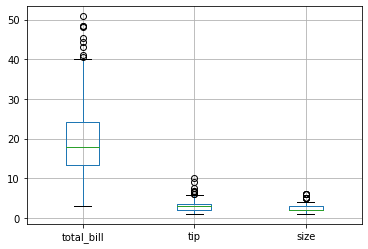

In [210]:
tips.boxplot()

descrete한 데이터와 continuos한 데이터의 통계값이 다르다. 모두 포함하는 것이 `inclued=all` 옵션이다.

In [211]:
tips.describe(include='all') 

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


`include`옵션을 통해서 특정 데이터 타입에 대한 통계값만 볼 수 있다.

In [212]:
tips.describe(include='int64')  #int64 데이터 타입만 보기

,size
count,244.000000
mean,2.569672
std,0.951100
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,6.000000


In [213]:
tips.describe(include=['int64', 'float64']) # 2개 데이터 타입 지정해서 보기

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


`describe`의 결과도 pandas의 `DataFrame` 객체이므로 조작할 수 있다.

In [219]:
tips.describe().T # 표를 전치하기 위해 numpy의 T 메소드를 이용한다

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [220]:
tips.describe().T[['std', 'mean']]

,std,mean
total_bill,8.902412,19.785943
tip,1.383638,2.998279
size,0.951100,2.569672


### skew와 kurt
skew(왜도)와 kurt(첨도)는 데이터가 잘 수집되었는지 확인할 때 사용한다.

In [214]:
tips.skew() # 왜도

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

In [215]:
tips.kurt() # 첨도

total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64

In [216]:
 tips.kurtosis() # kurt와 같다.

total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64